In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.stats import linregress


In [13]:
filepath = r"C:\Users\thindle2016\OneDrive - Florida Atlantic University\GitHub\laboratory-workshops\electrophysiology\data\earthworm_55mmLtoG1_59mmLtoG2\earthworm_55mmLtoG1_59mmLtoG2_32_inverted.csv"

df = pd.read_csv(filepath)
df.head()

,Time (ms),Voltage (mV)
0,-1.321415,-73.99212
1,-1.318855,-73.99212
2,-1.316295,-73.99212
3,-1.313735,-73.99212
4,-1.311175,-69.50591


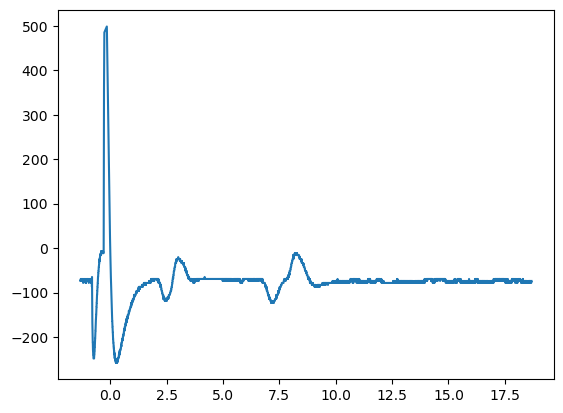

In [14]:
x = df['Time (ms)']
y = df['Voltage (mV)']

plt.plot(x, y)

plt.show()

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.peak_prominences.html#scipy.signal.peak_prominences

In [15]:
peaks_max, _ = find_peaks(y, prominence=50, distance=100) # tolerance 50mV 100ms
local_maxima = df.iloc[peaks_max]

peaks_min, _ = find_peaks(-y, prominence=25, distance=100) # tolerance 25mV 100ms
local_minima = df.iloc[peaks_min]

baseline = -72.5 # mV

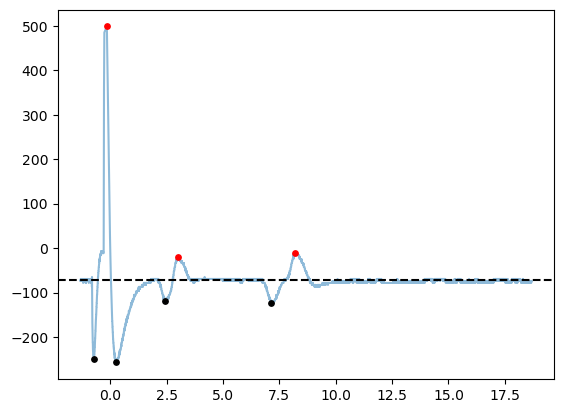

In [16]:
plt.scatter(local_maxima['Time (ms)'], local_maxima['Voltage (mV)'], s=15, c='r', zorder=2)
plt.scatter(local_minima['Time (ms)'], local_minima['Voltage (mV)'], s=15, c='k', zorder=2)
plt.plot(x, y, alpha=0.5, zorder=1)
plt.axhline(baseline, c='k', ls='--')

plt.show()

In [17]:
# measurements given by ruler (unit in millimeters)
stimulus_to_g1_distance = 55
stimulus_to_g2_distance = 59

g1_to_g2_distance = stimulus_to_g2_distance - stimulus_to_g1_distance
print(f"Distance G1 to G2 = {g1_to_g2_distance} mm")

Distance G1 to G2 = 4 mm


In [18]:
mgf_latency_to_g1, lgf_latency_to_g1 = local_minima[2:4]['Time (ms)']
mgf_latency_to_g2, lgf_latency_to_g2 = local_maxima[1:3]['Time (ms)']

print(f"MGF Latency to G1 = {mgf_latency_to_g1:.2f} ms \nMGF Latency to G2 = {mgf_latency_to_g2:.2f} ms")
print(f"LGF Latency to G1 = {lgf_latency_to_g1:.2f} ms \nLGF Latency to G2 = {lgf_latency_to_g2:.2f} ms")

MGF Latency to G1 = 2.41 ms 
MGF Latency to G2 = 3.01 ms
LGF Latency to G1 = 7.14 ms 
LGF Latency to G2 = 8.19 ms


In [19]:
mgf_g1_to_g2 = mgf_latency_to_g2 - mgf_latency_to_g1
lgf_g1_to_g2 = lgf_latency_to_g2 - lgf_latency_to_g1

print(f"MGF G1 to G2 = {mgf_g1_to_g2:.2f} ms")
print(f"LGF G1 to G2 = {lgf_g1_to_g2:.2f} ms")

MGF G1 to G2 = 0.60 ms
LGF G1 to G2 = 1.05 ms


In [20]:
data = pd.DataFrame(
    pd.Series(
        {
            'id': 'earthworm_1',
            'stimulus_to_g1_distance': stimulus_to_g1_distance,
            'stimulus_to_g2_distance': stimulus_to_g2_distance,
            'g1_to_g2_distance': g1_to_g2_distance,
            'mgf_latency_to_g1': mgf_latency_to_g1,
            'mgf_latency_to_g2': mgf_latency_to_g2,
            'lgf_latency_to_g1': lgf_latency_to_g1,
            'lgf_latency_to_g2': lgf_latency_to_g2,
            'mgf_g1_to_g2': mgf_g1_to_g2,
            'lgf_g1_to_g2': lgf_g1_to_g2
        }
    )
)

data = data.T
data

,id,stimulus_to_g1_distance,stimulus_to_g2_distance,g1_to_g2_distance,mgf_latency_to_g1,mgf_latency_to_g2,lgf_latency_to_g1,lgf_latency_to_g2,mgf_g1_to_g2,lgf_g1_to_g2
0,earthworm_1,55,59,4,2.413625,3.012665,7.144505,8.191545,0.59904,1.04704


Conduction velocity is defined as the speed at which a stimulus travels across a nerve and can be determined by measuring the time (milliseconds) required for an action potential to propagate across a known distance.

Measuring conduction velocity of the earthworm MGF and LGF. A) Earthworm anatomy superimposed with electrophysiological response. Stimulating electrodes (+/-) as well as recording electrodes are shown with the direction of the action potential triggered from the stimulus. The change in distance between L to G1, L to G2, and G1 to G2 are measured from the preparation.

![](figures/earthworm-conduction-velocity-MGF-LGF.png)

for both MGF and LGF,
Record the distance between the negative stimulating electrode to G1, negative stimulating to G2 and the distance between G2 and G1.
Calculate conduction velocity as Δd/Δt

_Lumbricus terrestris_, the earthworm, has three nerve cords: one Median Giant Fiber (MGF) and two Lateral Giant Fibers (LGF). These two cords vary in size where the MGF is about 70µm wide, and the LGF is smaller, at 50µm.

In [22]:
samples = pd.read_excel(r"C:\Users\thindle2016\OneDrive - Florida Atlantic University\GitHub\laboratory-workshops\electrophysiology\data\neurophys_lab_sample_data\conduction_velocity_dataset.xlsx")
samples

,ID,Axon,L-G1 (mm),L-G1 (ms),L-G2 (mm),L-G2 (ms),G1-G2 (mm),G1-G2 (ms)
0,Worm 1,MGF,55,3.449,60,4.006,10,0.6120
1,Worm 1,LGF,55,8.289,60,9.124,10,0.8091
2,Worm 2,MGF,35,1.947,45,2.448,15,0.5007
3,Worm 2,LGF,35,5.508,45,6.676,15,1.1678
4,Worm 3,MGF,55,2.445,65,2.902,10,0.5080
5,Worm 3,LGF,55,6.856,65,8.121,10,1.1810


In [24]:
samples['conduction_velocity'] = samples['G1-G2 (mm)'] / samples['G1-G2 (ms)']
samples

,ID,Axon,L-G1 (mm),L-G1 (ms),L-G2 (mm),L-G2 (ms),G1-G2 (mm),G1-G2 (ms),conduction_velocity
0,Worm 1,MGF,55,3.449,60,4.006,10,0.6120,16.339869
1,Worm 1,LGF,55,8.289,60,9.124,10,0.8091,12.359412
2,Worm 2,MGF,35,1.947,45,2.448,15,0.5007,29.958059
3,Worm 2,LGF,35,5.508,45,6.676,15,1.1678,12.844665
4,Worm 3,MGF,55,2.445,65,2.902,10,0.5080,19.685039
5,Worm 3,LGF,55,6.856,65,8.121,10,1.1810,8.467401


In [ ]:
cv_data = [
    [10, 2.69, 2.974],
    [20, 1.88, 4.267],
    [30, 1.51, 5.316],
    [40, 1.29, 6.202],
    [50, 1.14, 7.018],
    [60, 1.02, 7.843],
    [70, 1.01, 7.921],
    [80, 0.875, 9.143],
    [90, 0.82, 9.756],
    [100, 0.74, 10.811]
]

In [82]:
column_labels = ['Diameter (um)', 'Time (ms)', 'CV (m/s)']

cv_data = [
    [8.85, 2.69, 4.674],
    [19.24, 1.88, 4.267],
    [25.77, 1.51, 5.316],
    [27.36, 1.29, 6.202],
    [43.03, 1.14, 6.358],
    [56.16, 1.02, 7.843],
    [62.61, 1.01, 8.521],
    [77.97, 0.875, 8.543],
    [91.67, 0.82, 9.756],
    [96.07, 0.74, 10.811]
]

cv_df = pd.DataFrame(cv_data, columns=column_labels)

In [87]:
def relationship(x, y):
    fit = linregress(x, y)
    slope = fit.slope
    intercept = fit.intercept
    corr = fit.rvalue
    p =  fit.pvalue

    
    plt.scatter(x, y, c='#003366')
    plt.plot(x, intercept + slope * x, '#CC0000')

    plt.suptitle(f'{y.name} vs. {x.name}')
    plt.title(f'Pearson r Correlation = {corr:.3f} and p-value = {p:.7f}')
    plt.ylabel(f'{y.name}')
    plt.xlabel(f'{x.name}')
    plt.show()

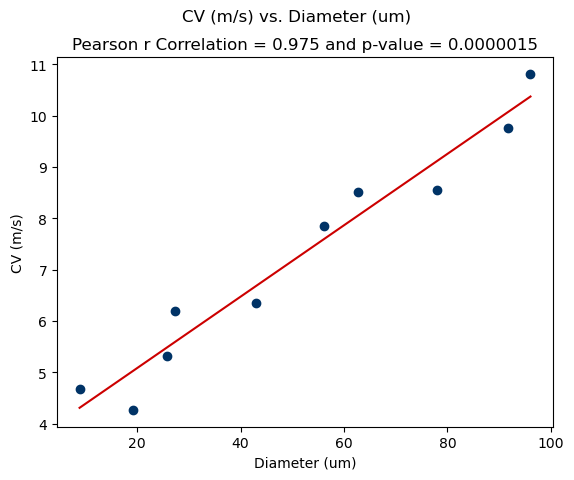

In [88]:
relationship(cv_df['Diameter (um)'], cv_df['CV (m/s)'])

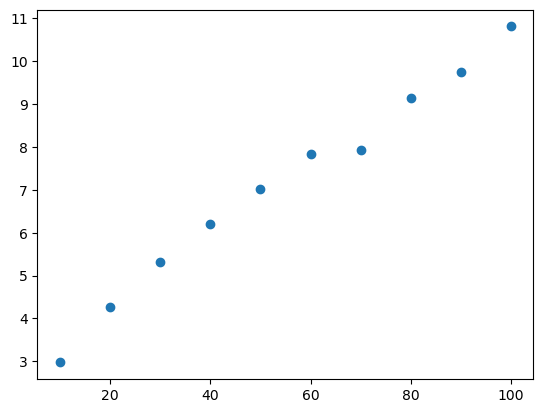

In [30]:
plt.scatter(cv_df['Diameter (um)'], cv_df['CV (m/s)'])